# Test Configuration Model on Temporal Networks

To test the model I check whether the constraints imposed are well reproduced.

In [91]:
import pandas as pd
import numpy as np
import networkx as nx

import seaborn as sns, matplotlib.pyplot as plt, operator as op

import os

import Utilities
from NaiveTCM import NaiveNetFitness
from PersistenceNetFitnessGlobal import PersistenceNetFitnessGlobal
from PersistenceNetFitness import PersistenceNetFitness
from PersistenceNetFitnesslinks import PersistenceNetFitnesslinks

In [92]:
cd ../Structural Break and Reconstruction Social Networks/temporal_networks_daily

[Errno 2] No such file or directory: '../Structural Break and Reconstruction Social Networks/temporal_networks_daily'
/home/virginio.clemente/Structural Break and Reconstruction Social Networks/temporal_networks_daily


In [187]:
data = []

for file in os.listdir():
    if 'checkpoints' in file: continue
    step = int(file.split('_')[1].split('.')[0])
    matrix = np.genfromtxt(file,delimiter=',')
    G = nx.from_numpy_matrix(matrix)
    data.append([step , G ]) 

data.sort()

# Here I verify that all the models reproduce the constrained features

In [94]:
tnet_synt_all = Utilities.TemporalNetworkLoaderSynt(data,0,50)

In [95]:
# I initialize the value of alfa and beta randomly
alfa_rand = np.random.rand(92) 
beta_rand =np.random.rand(92) 

### Temporal Configuration Model

In [96]:
pnt_likelihood_TCM = PersistenceNetFitness(tnet_synt_all)

pnt_likelihood_TCM.solve(alfa_rand,beta_rand)

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH


30205.76942172821

### I compute the expected values of k and h w.r.t. the TCM

In [97]:
k_exp =  np.zeros( pnt_likelihood_TCM.no_nodes )
h_exp =  np.zeros( pnt_likelihood_TCM.no_nodes )

y = pnt_likelihood_TCM.fitness_y
x = pnt_likelihood_TCM.fitness_x
tau = 1

T = pnt_likelihood_TCM.no_steps


lambda_minus = pnt_likelihood_TCM.lambda_minus 
lambda_plus = pnt_likelihood_TCM.lambda_plus
for i in range(pnt_likelihood_TCM.no_nodes):
    for j in range(pnt_likelihood_TCM.no_nodes):
        if i == j:
            continue

        
        root = np.sqrt(np.exp(-1*(np.log(y[i]) + np.log(y[j]))) + np.sinh(1/(2)*(np.log(x[i])+np.log(x[j]) +np.log(y[i]) +np.log(y[j])))**2 )                   
        sinhB = np.sinh(1/(2) * (np.log(x[i])+np.log(x[j]) +np.log(y[i]) +np.log(y[j])))

        coshB = np.cosh(1/(2) * (np.log(x[i])+np.log(x[j]) +np.log(y[i]) +np.log(y[j])))

        e_2B = np.exp(-1 * (np.log(x[i])+np.log(x[j]) +np.log(y[i]) +np.log(y[j])))
        e_B = np.exp(-1/2 * (np.log(x[i])+np.log(x[j]) +np.log(y[i]) +np.log(y[j])))

        eJ = np.exp(1/(4)*(np.log(y[i]) + np.log(y[j])))


        sigma_l_t = (sinhB) / ( 2*root) + 1/2 

        k_exp[i] += eJ/(2*(lambda_minus[i,j]**T + lambda_plus[i,j]**T)) * ( lambda_plus[i,j]**(T-1)*(sinhB + (sinhB*coshB)/root ) + lambda_minus[i,j]**(T-1)*(sinhB - (sinhB*coshB)/root )  ) +1/2 # N.T.L.

        h_exp [i] += sigma_l_t**2 + (1-sigma_l_t)*sigma_l_t*(lambda_minus[i,j]**tau*lambda_plus[i,j]**(T-tau) + lambda_plus[i,j]**tau*lambda_minus[i,j]**(T-tau) )/(lambda_minus[i,j]**T + lambda_plus[i,j]**T ) # N.T.L.



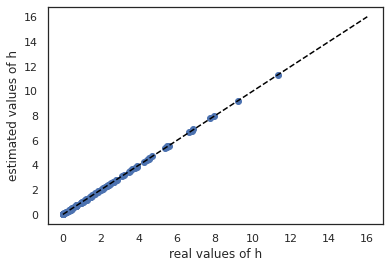

In [98]:
plt.xlabel('real values of h')
plt.ylabel('estimated values of h')
plt.scatter(h_exp,pnt_likelihood_TCM.vec_h)
plt.plot([0, 16], [0, 16], ls="--", c="0")
plt.show()

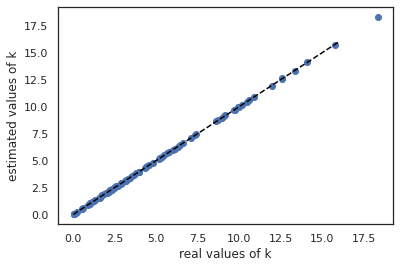

In [99]:
plt.xlabel('real values of k')
plt.ylabel('estimated values of k')
plt.scatter(k_exp,pnt_likelihood_TCM.vec_k)
plt.plot([0, 16], [0, 16], ls="--", c="0")
plt.show()

### Dyadic Configuration Model

In this case the calculation is trivial, indeed it is directly computed by inverting the following equaiton. and all the equations are independent.

In [100]:
pnt_likelihood_link = PersistenceNetFitnesslinks(tnet_synt_all) 

alfa_random_link = np.random.rand(92) 
beta_random_link =np.random.rand(46*91) 

In [101]:
pnt_likelihood_link.solve(alfa_random_link,beta_random_link)

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH


27524.23618354759

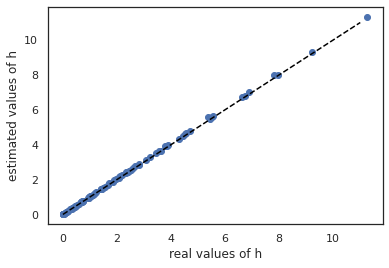

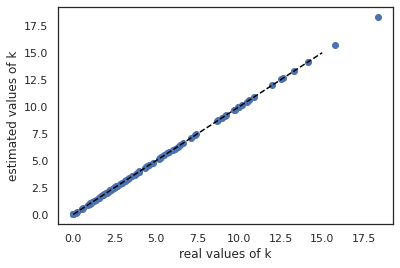

In [102]:
from sklearn.metrics import mean_squared_error

tnet_synt_all = Utilities.TemporalNetworkLoaderSynt(data,0,50)

alfa_link = pnt_likelihood_link.fitness_alpha   
beta_link =  pnt_likelihood_link.fitness_beta


y_link = pnt_likelihood_link.fitness_y 
y_matrix = np.zeros((pnt_likelihood_link.no_nodes,pnt_likelihood_link.no_nodes))

ij = 0
for i in range(pnt_likelihood_link.no_nodes):
    for j in range(i):

        y_matrix[i,j] = y_link[ij]
        y_matrix[j,i] = y_matrix[i,j]

        ij +=1

x = pnt_likelihood_link.fitness_x 
n_nodes =  pnt_likelihood_link.no_nodes


k_exp =  np.zeros( pnt_likelihood_link.no_nodes )
h_exp =  np.zeros( pnt_likelihood_link.no_nodes )


T = pnt_likelihood_link.no_steps


lambda_minus = pnt_likelihood_link.lambda_minus 
lambda_plus = pnt_likelihood_link.lambda_plus
for i in range(pnt_likelihood_link.no_nodes):
    for j in range(pnt_likelihood_link.no_nodes):
        if i == j:
            continue

        y_ij = y_matrix[i,j]
        root = np.sqrt(np.exp(-1*(np.log(y_ij, dtype=np.float128)), dtype=np.float128) + np.sinh(1/(2)*(np.log(x[i], dtype=np.float128)+np.log(x[j], dtype=np.float128) +np.log(y_ij) ), dtype=np.float128)**2 )                   
        sinhB = np.sinh(1/(2) * (np.log(x[i], dtype=np.float128)+np.log(x[j], dtype=np.float128) +np.log(y_ij, dtype=np.float128) ), dtype=np.float128)

        coshB = np.cosh(1/(2) * (np.log(x[i], dtype=np.float128)+np.log(x[j], dtype=np.float128) +np.log(y_ij) ), dtype=np.float128)

        e_2B = np.exp(-1 * (np.log(x[i])+np.log(x[j]) +np.log(y_ij)), dtype=np.float128)
        e_B = np.exp(-1/2 * (np.log(x[i])+np.log(x[j]) +np.log(y_ij)), dtype=np.float128)

        eJ = np.exp(1/(4)*(np.log(y_ij)), dtype=np.float128)

        sigma_l_t = (sinhB) / ( 2*root) + 1/2 

        k_exp[i] += eJ/(2*(lambda_minus[i,j]**T + lambda_plus[i,j]**T)) * ( lambda_plus[i,j]**(T-1)*(sinhB + (sinhB*coshB)/root ) + lambda_minus[i,j]**(T-1)*(sinhB - (sinhB*coshB)/root )  ) +1/2 # N.T.L.

        h_exp [i] += sigma_l_t**2 + (1-sigma_l_t)*sigma_l_t*(lambda_minus[i,j]*lambda_plus[i,j]**(T-1) + lambda_plus[i,j]*lambda_minus[i,j]**(T-1) )/(lambda_minus[i,j]**T + lambda_plus[i,j]**T ) # N.T.L.


plt.scatter(pnt_likelihood_link.vec_h, h_exp)
plt.plot([0, 11], [0, 11], ls="--", c="0")
plt.xlabel('real values of h')
plt.ylabel('estimated values of h')
plt.show()


plt.scatter(pnt_likelihood_link.vec_k, k_exp)
plt.plot([0, 15], [0, 15], ls="--", c="0")
plt.xlabel('real values of k')
plt.ylabel('estimated values of k')
plt.show()


### Global Contraint

### In this case the lagrange multiplier is one and controls the value of the average degree

In [103]:
pnt_likelihood_global = PersistenceNetFitnessGlobal(tnet_synt_all)

In [104]:
alfa_rand_global = np.random.rand(92) 
beta_rand_global = np.random.rand(1)


pnt_likelihood_global.solve(alfa_rand_global,beta_rand_global)

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH


30844.863605726394

In [105]:
y = pnt_likelihood_global.fitness_y
x = pnt_likelihood_global.fitness_x

k_exp =  np.zeros( pnt_likelihood_global.no_nodes )
h_exp =  np.zeros( pnt_likelihood_global.no_nodes )
h_ave = np.zeros(1)

T = pnt_likelihood_global.no_steps

lambda_plus = pnt_likelihood_global.lambda_plus
lambda_minus = pnt_likelihood_global.lambda_minus            

for i in range(pnt_likelihood_global.no_nodes):
    for j in range(pnt_likelihood_global.no_nodes):
        if i == j:
            continue
            
        root = np.sqrt(np.exp(-1*(np.log(y[0]) + np.log(y[0]))) + np.sinh(1/(2)*(np.log(x[i])+np.log(x[j]) +np.log(y[0]) +np.log(y[0])))**2 )                   
        sinhB = np.sinh(1/(2) * (np.log(x[i])+np.log(x[j]) +np.log(y[0]) +np.log(y[0])))

        coshB = np.cosh(1/(2) * (np.log(x[i])+np.log(x[j]) +np.log(y[0]) +np.log(y[0])))

        e_2B = np.exp(-1 * (np.log(x[i])+np.log(x[j]) +np.log(y[0]) +np.log(y[0])))
        e_B = np.exp(-1/2 * (np.log(x[i])+np.log(x[j]) +np.log(y[0]) +np.log(y[0])))

        eJ = np.exp(1/(4)*(np.log(y[0]) + np.log(y[0])))

        sigma_l_t = (sinhB) / ( 2*root) + 1/2 

        k_exp[i] += eJ/(2*(lambda_minus[i,j]**T + lambda_plus[i,j]**T)) * ( lambda_plus[i,j]**(T-1)*(sinhB + (sinhB*coshB)/root ) + lambda_minus[i,j]**(T-1)*(sinhB - (sinhB*coshB)/root )  ) +1/2 # N.T.L.

        h_exp [i] += sigma_l_t**2 + (1-sigma_l_t)*sigma_l_t*(lambda_minus[i,j]*lambda_plus[i,j]**(T-1) + lambda_plus[i,j]*lambda_minus[i,j]**(T-1) )/(lambda_minus[i,j]**T + lambda_plus[i,j]**T ) # N.T.L.

h_ave =  np.sum(h_exp)/pnt_likelihood_global.no_nodes

In [106]:
h_ave

2.2044464443302725

In [107]:
pnt_likelihood_global.average_h

2.2013043478260874

# Structural Break detections Dyadic TCM

In [108]:
import multiprocessing

class compute_likelihood():
       
    def __init__(self, data, alfa, beta):
        
        self.data = data
        self.alfa = alfa
        self.beta = beta
        
    def compute_likelihood_all(self):
        
        tnet_synt_all = Utilities.TemporalNetworkLoaderSynt(self.data,0,len(self.data))
        
        pnt_likelihood_all = PersistenceNetFitnesslinks(tnet_synt_all)
        
        likelihood_all = pnt_likelihood_all.solve(self.alfa,self.beta)
    
        AIC_all = AIC(-likelihood_all,len(self.alfa)+ 48*91)

        return AIC_all
        
    def compute_likelihood_diff(self,t):
        
        tnet_synt_0 = Utilities.TemporalNetworkLoaderSynt(self.data,0,t)
        tnet_synt_1 = Utilities.TemporalNetworkLoaderSynt(self.data,t,len(self.data))

        pnt_likelihood_0 = PersistenceNetFitnesslinks(tnet_synt_0)
        pnt_likelihood_1 = PersistenceNetFitnesslinks(tnet_synt_1)


        likelihood_0 = pnt_likelihood_0.solve(self.alfa,self.beta)


        likelihood_1 = pnt_likelihood_1.solve(self.alfa,self.beta)    

        
        AIC_diff = AIC(-likelihood_0-likelihood_1,(len(self.alfa)+(48*91))*2)
        
        return AIC_diff
    

In [109]:
pool = multiprocessing.Pool()
  
pool = multiprocessing.Pool(processes=10)

Process ForkPoolWorker-51:
Process ForkPoolWorker-50:
Process ForkPoolWorker-48:
Process ForkPoolWorker-52:
Process ForkPoolWorker-45:
Process ForkPoolWorker-47:
Process ForkPoolWorker-49:
Process ForkPoolWorker-46:
Process ForkPoolWorker-43:
Process ForkPoolWorker-44:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/virginio.clemente/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/virginio.clemente/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/virginio.clemente/anaconda3/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/virginio.clemente/anaconda3/lib/python3.8/multiprocessing/process.py", line

In [111]:
breaks_trovati = []

last_increment= 0

last_t_break = 0

candidate_break = 0

while candidate_break < len(data)-3:
    
    print(breaks_trovati)
    to_continue= True

    if last_t_break + 50 < len(data):
        last_increment = 50
    else:
        last_increment = len(data) - last_t_break - 3
        
    
    while to_continue:


        candidate_break = last_t_break + last_increment

        data_input = data[last_t_break:candidate_break] # last_t_break+18
        t_vec = list(range(3,len(data_input)-2)) 


        prova_likelihood = compute_likelihood(data_input,alfa_rand,beta_rand)

        lik_all = prova_likelihood.compute_likelihood_all()

        outputs = pool.map(prova_likelihood.compute_likelihood_diff, t_vec)

        arg_min = np.argmin(np.asarray(outputs) - lik_all)


        if np.asarray(outputs)[arg_min]> lik_all:
            to_continue = False
            print()
            print('No Breaks')
            print()
            last_increment = len(outputs)
            last_t_break += last_increment             
            to_continue = False

        elif arg_min < 3:
            print(arg_min + 3)
            to_continue = False
            last_t_break += last_increment 
            breaks_trovati.append(last_t_break)
            
        else:
            to_continue = False
            last_increment = arg_min + 3
            last_t_break += last_increment 
            breaks_trovati.append(last_t_break)

[]


NameError: name 'TemporalNetworkLoaderSynt' is not defined

In [112]:
len(data)

244

# Computing AIC Total 

In [254]:
cm_breaks = [0,244] #[0, 4, 9, 13, 18, 21, 26, 29, 32, 35, 38, 43, 47, 51, 54, 58, 62, 65, 68, 71, 74, 78, 81, 86, 90, 95, 100, 103, 107, 110, 114, 117, 122, 126, 130, 135, 138, 142, 145, 150, 155, 158, 162, 165, 170, 173, 177, 180, 183, 186, 189, 192, 196, 199, 204, 209, 212, 215, 218, 221, 226, 229, 233, 236, 240, 244]

dyadic_breaks = [0,26,110,156,202,244]

local_breaks = [0,8,15,19,24,36,45,52,61,77,99,110,117,124,131,142,150,165,177,193,214,231,244]

global_breaks = [0,8,15,18,21,24,28,36,43,49,53,61,77,99,107,110,116,126,141,150,165,186,193,214,231,244]

### AIC Dyadic Constraints

In [114]:
aic_total_dyadic = 0

for i in range(1,len(dyadic_breaks)):

    tnet_synt_all = Utilities.TemporalNetworkLoaderSynt(data[dyadic_breaks[i-1]:dyadic_breaks[i]],0,len(data))
    
    pnt_likelihood_link = PersistenceNetFitnesslinks(tnet_synt_all)
    
    likelihood_link = pnt_likelihood_link.solve(alfa_random_link,beta_random_link)
    
    aic_total_dyadic += Utilities.AIC(-likelihood_link,(len(alfa_random_link)+(46*91))*2)

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH


/home/virginio.clemente/Versione finale codici TN/PersistenceNetFitnesslinks.py:195: RuntimeWarning: overflow encountered in power
  np.power(self.lambda_plus[i, j], T - 1, dtype=np.float64)) * D_Lambda_plus_D_Alfa + T * (
/home/virginio.clemente/Versione finale codici TN/PersistenceNetFitnesslinks.py:198: RuntimeWarning: overflow encountered in power
  np.power(self.lambda_plus[i, j], T, dtype=np.float64) + np.power(
/home/virginio.clemente/Versione finale codici TN/PersistenceNetFitnesslinks.py:194: RuntimeWarning: invalid value encountered in double_scalars
  t_sum_alfa += (T * (
/home/virginio.clemente/Versione finale codici TN/PersistenceNetFitnesslinks.py:194: RuntimeWarning: overflow encountered in double_scalars
  t_sum_alfa += (T * (
/home/virginio.clemente/Versione finale codici TN/PersistenceNetFitnesslinks.py:216: RuntimeWarning: overflow encountered in power
  np.power(self.lambda_plus[i, j], T - 1, dtype=np.float64)) * D_Lambda_plus_D_Beta + T * (
/home/virginio.clemente/

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH


In [115]:
print(aic_total_dyadic)

365826.4922422252


### AIC Local Constraints

In [116]:
AIC_tot_local = 0

for t_break in range(len(local_breaks)-1):
    
    input_data = data[local_breaks[t_break]:local_breaks[t_break+1]]
    
    tnet_synt = Utilities.TemporalNetworkLoaderSynt(input_data,0,len(input_data))
    
    pnt_likelihood_local = PersistenceNetFitness(tnet_synt)
    
    likelihood_local = pnt_likelihood_local.solve(alfa_rand,beta_rand)
    
    AIC_local = Utilities.AIC(-likelihood_local,2*len(alfa_rand))
    
    AIC_tot_local += AIC_local
    

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR

In [117]:
print(AIC_tot_local)

269352.6064722374


### AIC Global Constrains

In [118]:
AIC_tot_global = 0

for t_break in range(len(global_breaks)-1):
    
    input_data = data[global_breaks[t_break]:global_breaks[t_break+1]]
    
    tnet_synt = Utilities.TemporalNetworkLoaderSynt(input_data,0,len(input_data))
    
    pnt_likelihood_global = PersistenceNetFitnessGlobal(tnet_synt)
    
    likelihood_global = pnt_likelihood_global.solve(alfa_rand,beta_rand_global)
    
    AIC_global = Utilities.AIC(-likelihood_global,len(alfa_rand)+1)
    
    AIC_tot_global += AIC_global
    

KeyboardInterrupt: 

In [ ]:
print(AIC_tot_global)

### AIC CM 

In [256]:
AIC_tot_CM = 0

for t_break in range(len(cm_breaks)-1):

    input_data_cm = data[cm_breaks[t_break]:cm_breaks[t_break+1]]

    tnet_cm = Utilities.TemporalNetworkLoaderSynt(input_data_cm,0,len(input_data_cm))

    pnt_likelihood_local = PersistenceNetFitness(tnet_cm)

    pnt_likelihood_CM = NaiveNetFitness(tnet_cm)

    x_cm =  pnt_likelihood_CM.solve_eq()

    alfa_naive_all = [i  if i < np.infty else 1  for i in (-np.log(x_cm)) ]

    beta_naive_all = [1 for i in range(len(x_cm))]
    
    AIC_CM = Utilities.AIC(-pnt_likelihood_local.fun_likelihood(np.concatenate((alfa_naive_all,beta_naive_all))),len(alfa_naive_all))
    
    AIC_tot_CM += AIC_CM

print('AIC:')
print(AIC_tot_CM)

`gtol` termination condition is satisfied.
Function evaluations 13, initial cost 5.2380e+03, final cost 3.5824e-09, first-order optimality 2.78e-06.
`gtol` termination condition is satisfied.
AIC :
1398430.3821810952


<ipython-input-256-1c7fb3d3d538>:15: RuntimeWarning: divide by zero encountered in log
  alfa_naive_all = [i  if i < np.infty else 1  for i in (-np.log(x_cm)) ]


### Here I compute the eigenvalues for the Model with constraints at node level

In [198]:
input_data = data[193:214]#[36:45]#[77:99]#


tnet_synt = Utilities.TemporalNetworkLoaderSynt(input_data,0,len(input_data))
pnt_likelihood_TCM = PersistenceNetFitness(tnet_synt)

likelihood_pnt = pnt_likelihood_TCM.solve(alfa_rand,beta_rand)
    
x_all = pnt_likelihood_TCM.fitness_x
y_all = pnt_likelihood_TCM.fitness_y

T = pnt_likelihood_TCM.no_steps 


lambda_plus = pnt_likelihood_TCM.lambda_plus
lambda_minus = pnt_likelihood_TCM.lambda_minus

M = []

tau = 1

for i in range(pnt_likelihood_TCM.no_nodes):
    for j in range(pnt_likelihood_TCM.no_nodes):
        if i == j:
            continue   
        
        root = np.sqrt(np.exp(-1*(np.log(y_all[i]) + np.log(y_all[j]))) + np.sinh(1/(2)*(np.log(x_all[i])+np.log(x_all[j]) +np.log(y_all[i]) +np.log(y_all[j])))**2 )                   
        sinhB = np.sinh(1/(2) * (np.log(x_all[i],dtype=np.float128)+np.log(x_all[j],dtype=np.float128) +np.log(y_all[i],dtype=np.float128) +np.log(y_all[j],dtype=np.float128)),dtype=np.float128)
        
        coshB = np.cosh(1/(2) * (np.log(x_all[i])+np.log(x_all[j]) +np.log(y_all[i]) +np.log(y_all[j])))

        e_2B = np.exp(-1 * (np.log(x_all[i])+np.log(x_all[j]) +np.log(y_all[i]) +np.log(y_all[j])))
        e_B = np.exp(-1/2 * (np.log(x_all[i])+np.log(x_all[j]) +np.log(y_all[i]) +np.log(y_all[j])))

        eJ = np.exp(1/(4)*(np.log(y_all[i]) + np.log(y_all[j])))
        e2J = np.exp(1/(2)*(np.log(y_all[i],dtype=np.float128) + np.log(y_all[j],dtype=np.float128)),dtype=np.float128)
        e4J = np.exp( (np.log(y_all[i],dtype=np.float128) + np.log(y_all[j],dtype=np.float128)),dtype=np.float128)

        root_2 = np.sqrt(1+e4J*sinhB**2,dtype=np.float128)

        sigma_l_t = (sinhB) / ( 2*root) + 1/2 


        p_ij = (e2J*sinhB/(2*root_2)) * (np.power(lambda_plus[i,j],T,dtype=np.float128)- np.power(lambda_minus[i,j],T,dtype=np.float128))/(np.power(lambda_plus[i,j],T,dtype=np.float128)+np.power(lambda_minus[i,j],T,dtype=np.float128)) + 1/2

        q_ij = sigma_l_t**2 + (1-sigma_l_t)*sigma_l_t*(np.power(lambda_minus[i,j],tau,dtype=np.float128)*np.power(lambda_plus[i,j],T-tau,dtype=np.float128) + np.power(lambda_plus[i,j],tau,dtype=np.float128)*np.power(lambda_minus[i,j],T-tau,dtype=np.float128) )/(lambda_minus[i,j]**T + lambda_plus[i,j]**T ) 
       

        if p_ij == 1:

            M_ij = [[i,j],[0, 0],[0,0]]

        else:
            M_ij = [[i,j],[q_ij/p_ij, (p_ij-q_ij)/p_ij],[(p_ij-q_ij)/(1-p_ij),(1-2*p_ij + q_ij)/(1-p_ij)]]
        
        M.append(M_ij)



CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH


In [199]:
import scipy.linalg as la

autovalori_medi = []
autovalori_massimo = []
autovalori_89 = [] 
autovalori_6 = [] 
autovalori_1 = [] 



for i in range(pnt_likelihood_TCM.no_nodes):
    
    nodo_i = M[91*i:91*(i+1)]
    autovalori_2 = []
    
    for el in range(len(nodo_i)):

        A = nodo_i[el][1:]
        eigvals, eigvecs = la.eig(A)

        autovalori_2.append(sorted(eigvals,reverse=True)[1])
    if i == 1:
        autovalori_1.append(np.real(autovalori_2)) 
    if i== 89:
        autovalori_89.append(np.real(autovalori_2))
    if i == 6:
        autovalori_6.append(np.real(autovalori_2))
        
    media_autovalori_2 = np.sum(autovalori_2)/len(autovalori_2)
    massimo_autovalori_2 = np.max(autovalori_2)
    autovalori_medi.append(media_autovalori_2)
    autovalori_massimo.append(massimo_autovalori_2)


In [200]:
autovalori_medi_real = [autovalori_medi[i].real for i in range(len(autovalori_medi))   ]
autovalori_medi_real = np.asarray(autovalori_medi_real)

In [201]:
#autovalori_dict_medi = {}

#autovalori_dict_medi['T3'] = autovalori_medi_real

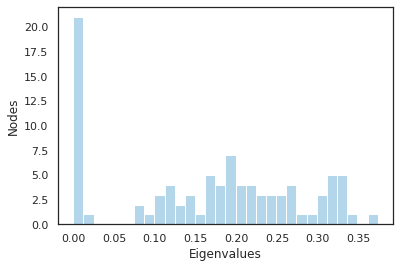

In [202]:
autovalori_data = {'Autovalori':autovalori_medi_real } 

autovalori_plot = pd.DataFrame(data=autovalori_data,index=range(len(autovalori_medi_real)))

sns.histplot(autovalori_plot,shrink=1,bins=30,palette='Blues')

plt.ylabel('Nodes')
plt.xlabel('Eigenvalues')
plt.legend([],[], frameon=False)
plt.show()

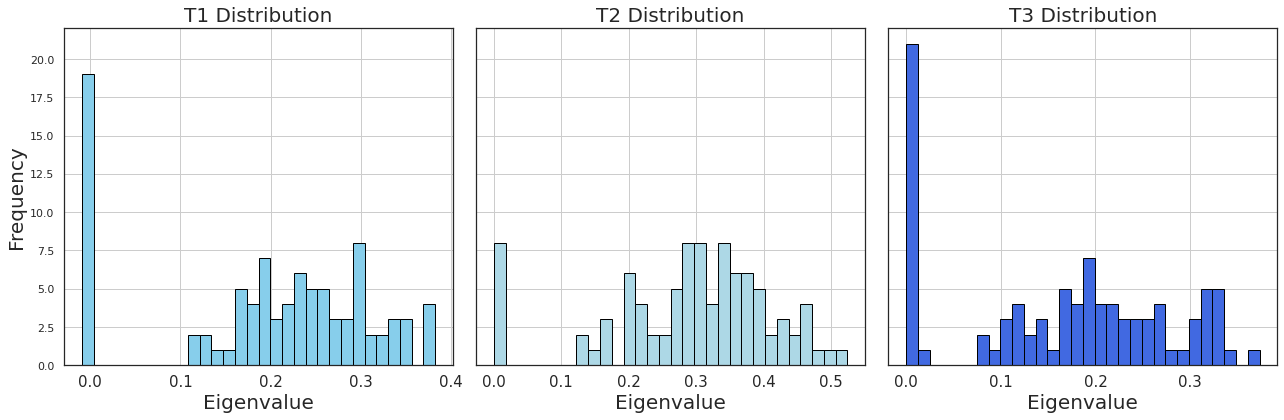

In [231]:
# Assuming d1, d2, and d3 are three separate distributions for the different time periods,
# we will generate a side-by-side histogram for each.
fontsize = 20

# For demonstration, I'll split the given data into three parts to simulate the three distributions.
# In practice, you would replace these with your actual distributions d1, d2, and d3.
d1 = autovalori_dict_medi['T1']
d2 = autovalori_dict_medi['T2']
d3 = autovalori_dict_medi['T3']

# Plotting the histograms side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Histogram for d1
axs[0].hist(d1, bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('T1 Distribution',fontsize=fontsize)
axs[0].set_xlabel('Eigenvalue',fontsize=fontsize)
axs[0].set_ylabel('Frequency',fontsize=fontsize)
axs[0].tick_params(axis='x', labelsize=15)
axs[0].grid(True)

# Histogram for d2
axs[1].hist(d2, bins=30, color='lightblue', edgecolor='black')
axs[1].set_title('T2 Distribution',fontsize=fontsize)
axs[1].set_xlabel('Eigenvalue',fontsize=fontsize)
axs[1].tick_params(axis='x', labelsize=15)
axs[1].grid(True)

# Histogram for d3
axs[2].hist(d3, bins=30, color='royalblue', edgecolor='black')
axs[2].set_title('T3 Distribution',fontsize=fontsize)
axs[2].set_xlabel('Eigenvalue',fontsize=fontsize)
axs[2].tick_params(axis='x', labelsize=15)
axs[2].grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [136]:
#nodes_dict = {}

#nodes_dict['Node 1'] = []
#nodes_dict['Node 6'] = []
#nodes_dict['Node 89'] = []


#nodes_dict['Node 1'].append(autovalori_1[0])
#nodes_dict['Node 6'].append(autovalori_6[0])
#nodes_dict['Node 89'].append(autovalori_89[0])

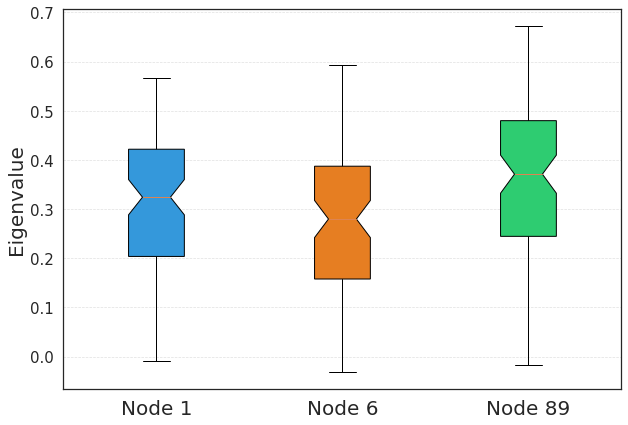

In [123]:
plt.figure(figsize=(10,7))

autovalori_data = {'Node 1': autovalori_1[0] , 'Node 6':autovalori_6[0], 'Node 89': autovalori_89[0]}  #, 'Japan': autovalori_jpn[0] , 'United Arab Emirates':autovalori_are[0],'Bolivia':autovalori_bol[0],'Austria':autovalori_aut[0]}

labels, data = autovalori_data.keys(), autovalori_data.values()

# Colors for the boxplots
colors = ['#3498db', '#e67e22','#2ecc71'] 

bp = plt.boxplot(data, patch_artist=True, notch=True)  # 'notch=True' for notches in boxplots

# Adding colors to boxplots
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Adding grid
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

# Labels, title and other properties
plt.ylabel('Eigenvalue', size=20)
plt.xticks(range(1, len(labels) + 1), labels, size=20)
plt.yticks(size=15)  # setting y-tick label size

plt.show()

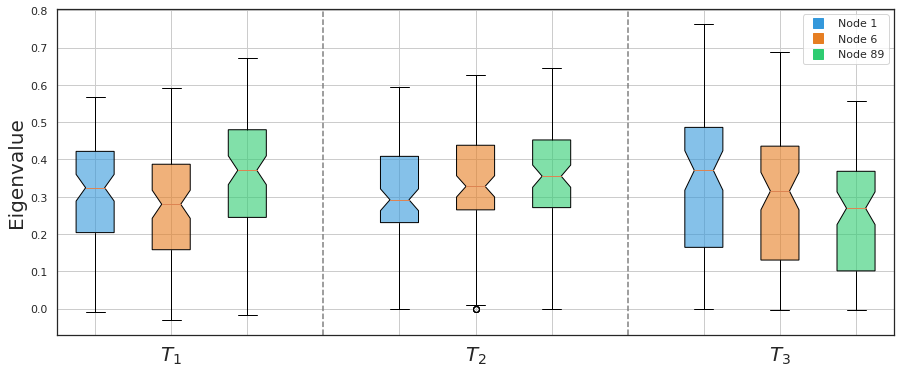

In [171]:
from matplotlib.colors import to_rgba

# Colori specifici per ogni nodo
colors = ['#3498db', '#e67e22', '#2ecc71']

# Preparazione dei dati per il boxplot con separazione e colori
data_periodi = []
labels_periodi = []
colors_periodi = []

alpha = 0.6  # Ridurre l'opacità
colors_rgba = [to_rgba(color, alpha) for color in colors]  # Convertire in RGBA con opacità ridotta


# Organizzare i dati per periodo invece che per nodo
for period in range(3):
    for i, (node, distributions) in enumerate(nodes_dict.items()):
        data_periodi.append(distributions[period])
        labels_periodi.append(f"{node} - T{period+1}")
        colors_periodi.append(colors[i])


# Creazione di posizioni per i boxplot con spazi maggiori tra i periodi
positions = []
current_position = 1
for i in range(len(data_periodi)):
    positions.append(current_position)
    current_position += 1
    # Aggiungere uno spazio extra dopo ogni terzo boxplot
    if (i + 1) % 3 == 0:
        current_position += 1  # Spazio extra tra i periodi

# Creazione del boxplot con le modifiche
plt.figure(figsize=(15, 6))
box = plt.boxplot(data_periodi, patch_artist=True, positions=positions,notch=True)

# Applicare i colori ai boxplot e aggiungere le linee di separazione
for i, patch in enumerate(box['boxes']):
    color_index = i % 3  # Indice per ciclare tra i colori dei tre nodi
    patch.set_facecolor(colors_rgba[color_index])

line_positions = [(positions[i * 3 - 1] + positions[i * 3]) / 2 for i in range(1, 3)]
for pos in line_positions:
    plt.axvline(x=pos, color='grey', linestyle='--')


    
new_labels = [''] * len(positions)
for i in range(3):
    center_position = i * 3 + 1  # Posizione centrale di ogni gruppo di tre boxplot
    if center_position < len(new_labels):
        new_labels[center_position] = f"$T_{i+1}$"

plt.xticks(positions, new_labels,fontsize=20)
    
    
    
# Aggiungere una legenda
patches = [plt.Line2D([0], [0], color=color, marker='s', linestyle='', markersize=10, markerfacecolor=color) for color in colors]
plt.legend(patches, ["Node 1", "Node 6", "Node 89"], loc='upper right')

    
plt.ylabel("Eigenvalue",fontsize=20)
#plt.xlabel("Nodi e Periodi Temporali")
plt.grid(True)
plt.show()


# Here I plot the real structural breaks vs the one found by the best model

In [172]:
lista_date = pd.date_range(start="2004-08-30",end="2005-05-02").strftime('%Y-%m-%d')

In [173]:
lista_eventi_reali = ['2004-09-07','2004-09-14','2004-09-24','2004-10-08','2004-10-15','2004-11-01',
                      
                      '2004-11-11','2004-11-17','2004-11-25','2004-12-01','2004-12-09','2004-12-13',
                     
                      '2004-12-18','2005-01-03','2005-01-10','2005-01-31','2005-02-18','2005-03-07',
                      
                      '2005-03-21','2005-03-28','2005-04-07','2005-04-18','2005-04-21'
                     ]

In [174]:
lista_breaks_predicted = [ 8, 15, 19, 24, 36, 45, 52, 61, 77, 99, 110, 117, 124, 131, 142, 150, 165, 177, 193, 214, 231]

In [175]:
date_predicted = []
for i in lista_breaks_predicted:
    date_predicted.append(lista_date[i])


In [176]:
point_predicted = [1 if el in date_predicted else 0 for el in lista_date]

point_real = [1 if el in lista_eventi_reali else 0 for el in lista_date]

In [177]:
date_x = [el if el in lista_eventi_reali else '' for el in lista_date]

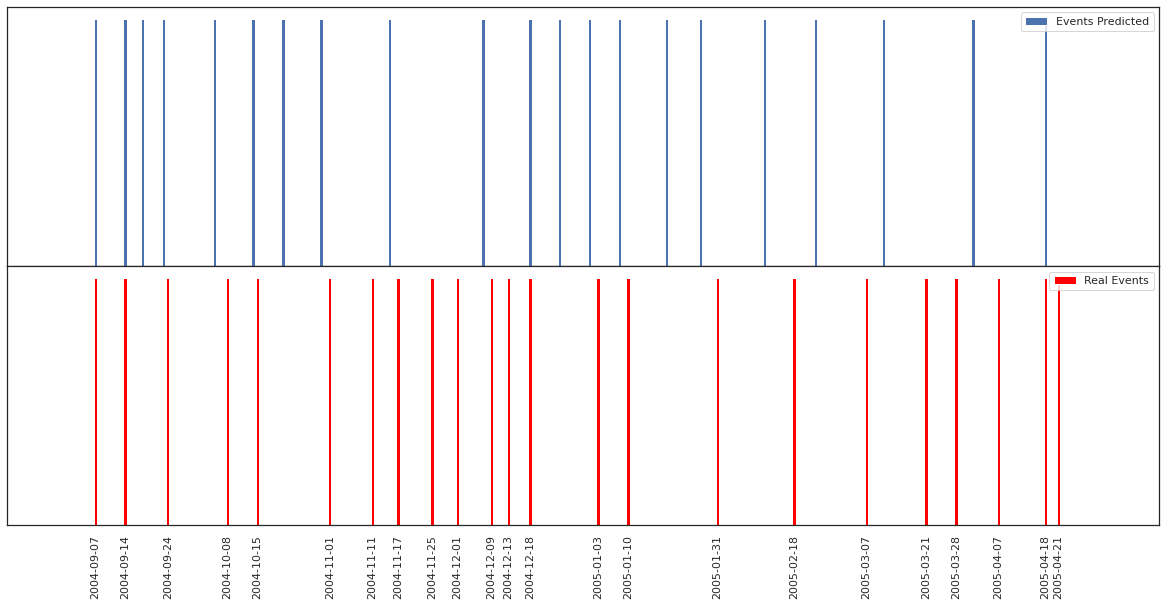

In [178]:
fig = plt.figure(figsize=(20,9))
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], yticklabels=[])
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   yticklabels=[])


ax1.bar(lista_date,point_predicted,label='Events Predicted')

ax2.bar(lista_date,point_real,color='red',label='Real Events')

plt.xticks(lista_date, date_x)
plt.xticks(rotation = 90)
ax2.legend()
ax1.legend()
ax1.tick_params(left = False)
ax2.tick_params(left = False)
plt.show()

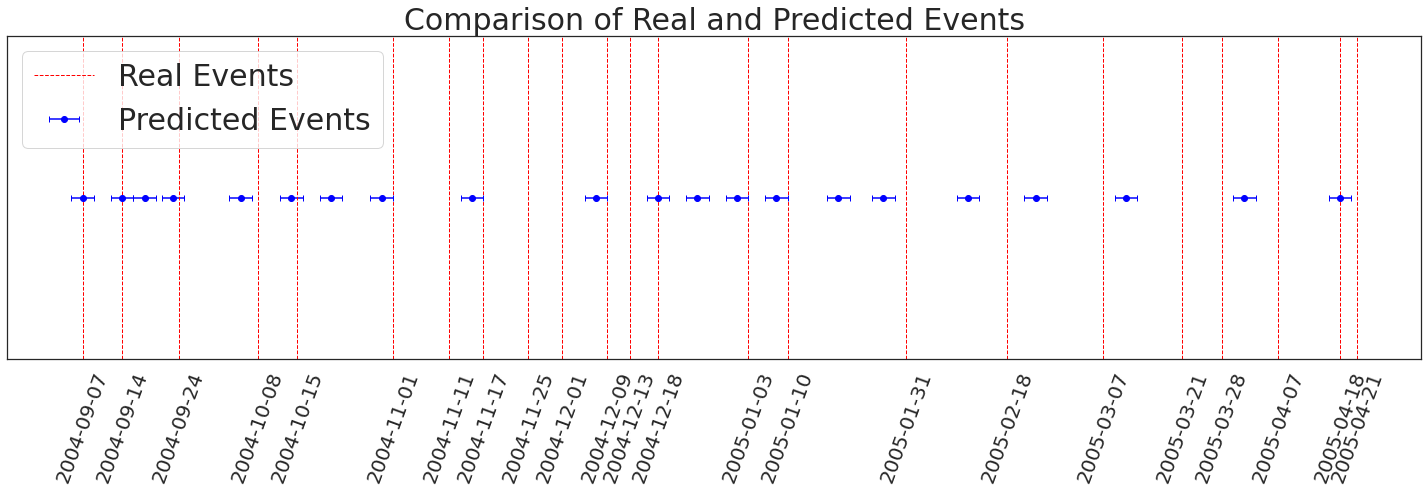

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Il tuo codice per generare 'lista_date', 'lista_eventi_reali', 'lista_breaks_predicted', ecc.

# ... (il tuo codice precedente)

fig, ax = plt.subplots(figsize=(20, 7))

# Linee verticali per gli eventi reali
for date in lista_eventi_reali:
    ax.axvline(pd.to_datetime(date), color='red', linestyle='--', linewidth=1, label='Real Events')

# Puntini con barrette orizzontali per gli eventi predetti
# Adesso imposto le barre a ±2 giorni
for index in lista_breaks_predicted:
    if 1 < index < len(lista_date) - 2:  # Assicurati che ci sia spazio per ±2 giorni
        date_center = mdates.date2num(pd.to_datetime(lista_date[index]))
        # Calcola l'errore in formato numerico
        error = mdates.date2num(pd.to_datetime(lista_date[index]) + pd.Timedelta(days=2)) - date_center
        ax.errorbar(date_center, 1, xerr=error, fmt='o', color='blue', capsize=3, label='Predicted Events')

# Imposto le etichette dell'asse x per corrispondere agli eventi reali
plt.xticks(mdates.date2num(pd.to_datetime(lista_date)), date_x)
plt.xticks(rotation=70,size=20)

# Formattazione delle date sull'asse x
#ax.xaxis.set_major_locator(mdates.MonthLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Riduci i duplicati nella legenda
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),fontsize=30)

# Titoli e etichette
ax.set_title('Comparison of Real and Predicted Events',size=30)
ax.set_yticklabels([])
#ax.set_xlabel('Events',size=20)

# Mostra il grafico
plt.tight_layout()
plt.show()
